Data set link - https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri


In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os
zip_file_path = '/content/drive/MyDrive/archive (12).zip'

# Path to the directory where you want to extract the contents
extracted_folder_path = '/content/extracted_folder/'

# Create directory if not exists
os.makedirs(extracted_folder_path, exist_ok=True)

# Download and extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)


In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

In [60]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle

split data

In [61]:
X_train = []
y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

for i in labels:
  folder_path = os.path.join('/content/extracted_folder/Training',i)
  for j in os.listdir(folder_path) :
    img  = cv2.imread(os.path.join(folder_path,j))
    img = cv2.resize(img,(image_size,image_size))
    X_train.append(img)
    y_train.append(i)

  for i in labels:
    folder_path = os.path.join('/content/extracted_folder/Testing',i)
    for j in os.listdir(folder_path) :
      img  = cv2.imread(os.path.join(folder_path,j))
      img = cv2.resize(img,(image_size,image_size))
      X_train.append(img)
      y_train.append(i)

In [62]:
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)

In [63]:
X_train, y_train = shuffle(X_train, y_train,random_state = 101)
y_train.shape

(4446,)

In [64]:
X_train , X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.15,random_state=101)

In [65]:
y_train_new = []
for i in y_train:
  y_train_new.append(labels.index(i))

y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
  y_test_new.append(labels.index(i))

y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [53]:
# X_train = X_train/255.0
# X_test = X_test/255.0

CNN

In [66]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(Dropout(0.3))

model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))

model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))

model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))

model.add(Dropout(0.3))

model.add(Dense(4,activation = 'softmax'))

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 73, 73, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_21 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [68]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [69]:
history = model.fit(X_train, y_train,epochs = 35, validation_split = 0.1)

Epoch 1/35
107/107 [==============================] - 14s 97ms/step - loss: 2.2644 - accuracy: 0.2946 - val_loss: 1.3688 - val_accuracy: 0.2884
Epoch 2/35
107/107 [==============================] - 10s 92ms/step - loss: 1.3722 - accuracy: 0.2990 - val_loss: 1.3605 - val_accuracy: 0.2884
Epoch 3/35
107/107 [==============================] - 10s 92ms/step - loss: 1.3305 - accuracy: 0.3634 - val_loss: 1.3217 - val_accuracy: 0.3915
Epoch 4/35
107/107 [==============================] - 10s 94ms/step - loss: 1.1860 - accuracy: 0.4605 - val_loss: 0.9829 - val_accuracy: 0.5767
Epoch 5/35
107/107 [==============================] - 10s 94ms/step - loss: 0.9813 - accuracy: 0.5528 - val_loss: 0.9666 - val_accuracy: 0.6032
Epoch 6/35
107/107 [==============================] - 10s 94ms/step - loss: 0.8532 - accuracy: 0.6339 - val_loss: 0.8009 - val_accuracy: 0.6640
Epoch 7/35
107/107 [==============================] - 10s 95ms/step - loss: 0.7333 - accuracy: 0.6880 - val_loss: 0.7708 - val_accuracy:

In [70]:
model.save('braintumor.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

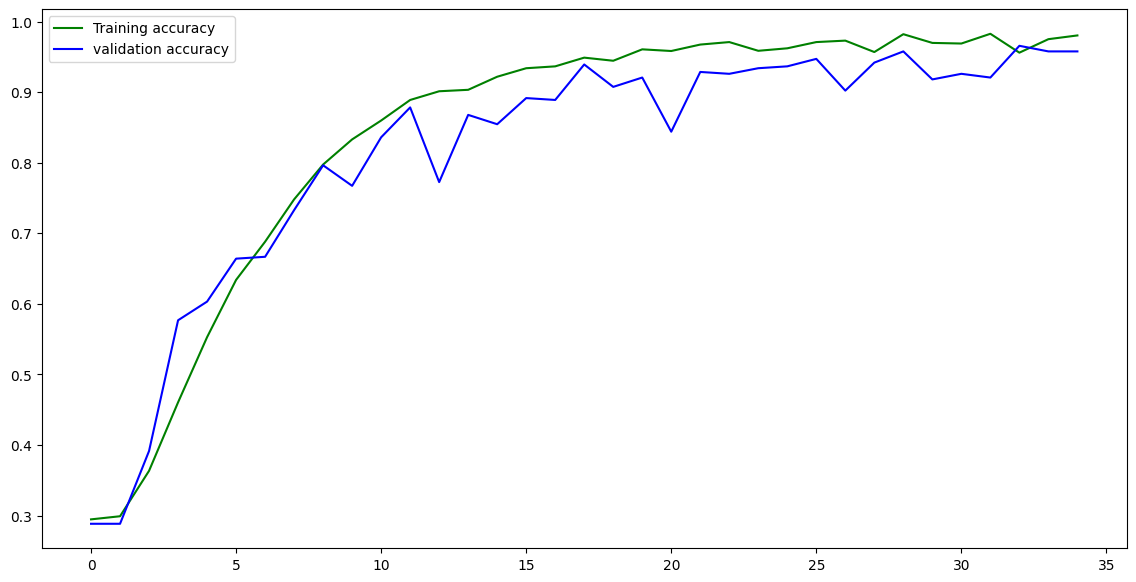

In [75]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'g',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='validation accuracy')
plt.legend(loc='upper left')

prediction

In [83]:
img = cv2.imread('/content/extracted_folder/Testing/glioma_tumor/image(14).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)

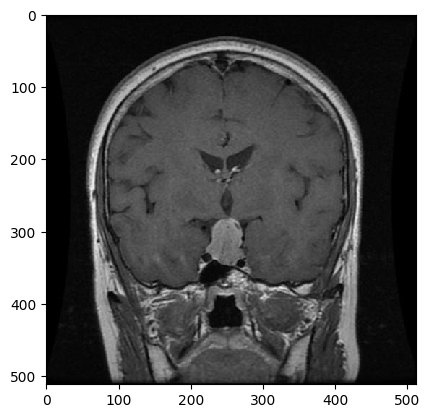

In [84]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/extracted_folder/Training/pituitary_tumor/p (100).jpg')
plt.imshow(img, interpolation = 'nearest')
plt.show()

In [85]:
a = model.predict(img_array)
indicies = a.argmax()
indicies

1/1 [==============================] - 0s 18ms/step


0